<a href="https://colab.research.google.com/github/AlexRod-NS/Algoritmos-en-Colaboratory/blob/main/Implementar_filtro_gaussiano_bidimensional_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
import numpy as np

%matplotlib inline
tf.__version__

'2.8.0'

In [2]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(len(X_train))
print(len(X_test))
print("Tamaño de la imagen", X_train[0].shape)

50000
10000
Tamaño de la imagen (32, 32, 3)


## Implementar la función para obtener el kernel

In [4]:
#Creando el filtro
def Gaussian_function(x, y, s):
  g = (1/(2*np.pi*(s**2))) * np.exp(-(x**2+y**2)/(2*s**2))
  return g

def get_GaussFilter(r, c, s):
  G_x = np.zeros((r, c))
  y = (r-1)/2
  for i in range(G_x.shape[0]):
    x = -(r-1)/2
    for j in range(G_x.shape[1]):
      G_x[i, j] = Gaussian_function(x, y, s)
      x+=1
    y-=1

  Sum = np.sum(G_x.flatten())
  for i in range(G_x.shape[0]):
    for j in range(G_x.shape[1]): G_x[i, j] = G_x[i, j]/Sum
  return G_x

G_x = get_GaussFilter(3, 3, 1.5)
G_x

array([[0.09474166, 0.11831801, 0.09474166],
       [0.11831801, 0.14776132, 0.11831801],
       [0.09474166, 0.11831801, 0.09474166]])

In [5]:
# Se parar la imagen en sus 3 canales
import cv2
def get_bgr(img):
  b, g, r = cv2.split(img) 
  return [b, g, r]

## Selección de alguna imagen

In [6]:
IMAGEN_GLOBAL = X_train[0]

## Implementar la función Zero padding

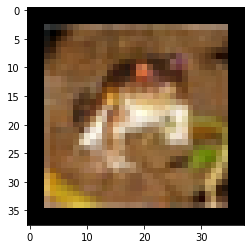

In [7]:
def zero_padding(imagen, p=1):
  chanels_bgr = get_bgr(imagen)
  chanels_padding = []
  for i in range(3):  chanels_padding.append(np.zeros((imagen.shape[0]+p*2, imagen.shape[1]+p*2)).astype("int64"))

  for i in range(1, len(imagen)+1):
    for c in range(3): chanels_padding[c][i+(p-1), p:chanels_padding[c].shape[1]-p] = chanels_bgr[c][i-1]

  return cv2.merge(chanels_padding)

img_padd = zero_padding(IMAGEN_GLOBAL, 3)
plt.imshow(img_padd)

## Implementar la función para aplicar el filtro utilizando la siguiente fórmula

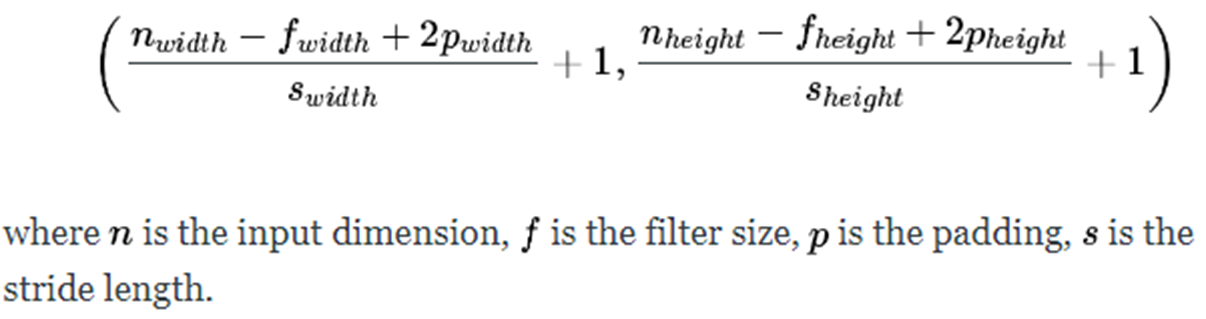

In [8]:
def apply_filter(IMAGEN, filtro, p=0, s=1):
  img_padd = zero_padding(IMAGEN, p)
  canales_bgr = get_bgr(img_padd)

  f = len(filtro)
  nr, nc = (IMAGEN.shape[0]-f+2*p)/s + 1, (IMAGEN.shape[1]-f+2*p)/s + 1

  ImagenFiltro_bgr = list()
  for k in range(3): ImagenFiltro_bgr.append(np.zeros((int(nr), int(nc))).astype("int64"))

  for r in range(0, int(nr), s):
    for c in range(0, int(nc), s):
      try:
        aux_bgr = [0]*3
        for i in range(f):
          for j in range(f):    
            for k in range(3): aux_bgr[k] += filtro[i, j]*canales_bgr[k][i+r, j+c] 
        for k in range(3): ImagenFiltro_bgr[k][r, c] = aux_bgr[k]
      except: pass

  return cv2.merge([ImagenFiltro_bgr[2], ImagenFiltro_bgr[1], ImagenFiltro_bgr[0]])

RESULT = apply_filter(IMAGEN_GLOBAL, G_x, 3, 1)

## Aplicar la función RELU

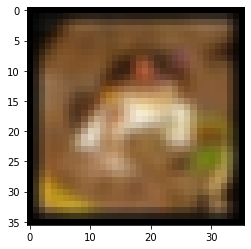

In [9]:
#Resultado a escala de colores
def RELU(I):
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      if I[i, j] <= 0: I[i, j] = 0
  return I
  
BGR = get_bgr(RESULT)
imgResult = cv2.merge([RELU(BGR[2]), RELU(BGR[1]), RELU(BGR[0])])
plt.imshow(imgResult)